###### Importing libraries

In [33]:
import pandas as pd
import numpy as np
import time

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

#sklearn
from sklearn import datasets, svm, metrics,tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#preprocessing
from sklearn.preprocessing import StandardScaler,normalize
# Dimenionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import random_projection
#Feature selection
from sklearn.feature_selection import VarianceThreshold
#Under sampling
#from imblearn.under_sampling import RandomUnderSampler
#Over sampling
#from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,RandomOverSampler
#Combined sampling
#from imblearn.combine import SMOTETomek
#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Perceptron,PassiveAggressiveClassifier,RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import resample
from sklearn.pipeline import *
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve

#import pandas_ml as pdml

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import itemfreq
import importlib
from importlib import reload  
from collections import defaultdict,Counter

from sklearn import preprocessing
%matplotlib inline 
pd.options.display.max_columns=200


from sklearn.metrics import accuracy_score,f1_score
from sklearn.utils import resample

np.random.seed(42)

###### Importing preprocessing file

In [2]:
import Preprocessing as pp

#reload(pp)

CRASH :  (234866, 23)
VEHICLE :  (474634, 17)
PEOPLE :  (413775, 16)
['LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'DOORING_I', 'WORK_ZONE_I', 'NUM_UNITS']
['UNIT_TYPE', 'VEHICLE_ID', 'CMRC_VEH_I', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'EXCEED_SPEED_LIMIT_I', 'CMV_ID', 'GVWR', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG']
['VEHICLE_ID', 'SEX', 'AGE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
[]
[]
[]
Vpa rd_no :  (234682, 1)
Vpa unit 1 :  (234732, 31)
Vpa unit 2 :  (234762, 61)
Vpa unit 3 :  (234762, 91)
Vpa unit 4 :  (234762, 121)
Vpa unit 5 :  (234762, 151)
Vpa unit 6 :  (234762, 181)
cvp with duplicates: (234641, 203)
cvp without duplicates: (234584, 203)
Dataframe size after adding dummies to crashes columns:  (234584, 287)
Dataframe size after adding dummies to v

###### Splitting target variable from other variables

In [3]:
df=pp.cvp_ohe
train_data=df.copy(deep=True)
train_data=train_data.drop(['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], axis=1)
train_labels=df[['PRIM_CONTRIBUTORY_CAUSE']].copy()

###### Splitting to train and test 


In [4]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels,test_size=0.20,stratify=train_labels,random_state=42)

In [5]:
print("X_train: ", X_train.shape)
print("y_train:", y_train.shape)

X_train:  (187667, 927)
y_train: (187667, 1)


In [6]:
train_XY = pd.concat([X_train, y_train], axis=1)
train_XY.shape

(187667, 928)

In [7]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{'ANIMAL': 189,
 'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 49,
 'CELL PHONE USE OTHER THAN TEXTING': 306,
 'DISREGARDING OTHER TRAFFIC SIGNS': 447,
 'DISREGARDING ROAD MARKINGS': 330,
 'DISREGARDING STOP SIGN': 2354,
 'DISREGARDING TRAFFIC SIGNALS': 3533,
 'DISREGARDING YIELD SIGN': 81,
 'DISTRACTION - FROM INSIDE VEHICLE': 1717,
 'DISTRACTION - FROM OUTSIDE VEHICLE': 1000,
 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 98,
 'DRIVING ON WRONG SIDE/WRONG WAY': 968,
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 7573,
 'EQUIPMENT - VEHICLE CONDITION': 1246,
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 436,
 'EXCEEDING AUTHORIZED SPEED LIMIT': 1597,
 'EXCEEDING SAFE SPEED FOR CONDITIONS': 1229,
 'FAILING TO REDUCE SPEED TO AVOID CRASH': 8683,
 'FAILING TO YIELD RIGHT-OF-WAY': 26421,
 'FOLLOWING TOO CLOSELY': 27383,
 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 257,
 'IMPROPER BACKING': 11016,
 'IMPROPER LANE USAGE': 9845,
 'IMPROPER OVERTAKING/PASS

In [8]:
#segregating each class into seperate DFs
dfMax = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='UNABLE TO DETERMINE']
df1 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='ANIMAL']
df2 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='BICYCLE ADVANCING LEGALLY ON RED LIGHT']
df3 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='CELL PHONE USE OTHER THAN TEXTING']
df4 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISREGARDING OTHER TRAFFIC SIGNS']
df5 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISREGARDING ROAD MARKINGS']
df6 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISREGARDING STOP SIGN']
df7 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISREGARDING TRAFFIC SIGNALS']
df8 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISREGARDING YIELD SIGN']
dfM9 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISTRACTION - FROM INSIDE VEHICLE']
df10 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISTRACTION - FROM OUTSIDE VEHICLE']
df11 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)']
df12 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DRIVING ON WRONG SIDE/WRONG WAY']
df13 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='DRIVING SKILLS/KNOWLEDGE/EXPERIENCE']
df14 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='EQUIPMENT - VEHICLE CONDITION']
df15 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST']
df16 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='EXCEEDING AUTHORIZED SPEED LIMIT']
df17 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='EXCEEDING SAFE SPEED FOR CONDITIONS']
df18 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='FAILING TO REDUCE SPEED TO AVOID CRASH']
df19 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='FAILING TO YIELD RIGHT-OF-WAY']
df20 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='FOLLOWING TOO CLOSELY']

In [9]:
#segregating each class into seperate DFs
df21 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)']
df22 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='IMPROPER BACKING']
df23 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='IMPROPER LANE USAGE']
df24 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='IMPROPER OVERTAKING/PASSING']
df25 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='IMPROPER TURNING/NO SIGNAL']
df26 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT']
df27 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='NOT APPLICABLE']
df28 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER']
df29 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='PASSING STOPPED SCHOOL BUS']
df30 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='PHYSICAL CONDITION OF DRIVER']
df31 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='ROAD CONSTRUCTION/MAINTENANCE']
df32 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='ROAD ENGINEERING/SURFACE/MARKING DEFECTS']
df33 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='TEXTING']
df34 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='TURNING RIGHT ON RED']
df36 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)']
df37 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)']
df38 = train_XY[train_XY.PRIM_CONTRIBUTORY_CAUSE=='WEATHER']

In [10]:
#downsampling majority class and upsampling minority classes

ds_dfMax = resample(dfMax, replace=False, n_samples=20000, random_state=42)
ds_df20 = resample(df20, replace=False, n_samples=15000, random_state=42)
ds_df26 = resample(df26, replace=True, n_samples=1000, random_state=42)
ds_df29 = resample(df29, replace=True, n_samples=2000, random_state=42)
ds_df8 = resample(df8, replace=True, n_samples=2000, random_state=42)
ds_df11 = resample(df11, replace=True, n_samples=4000, random_state=42)
ds_df33 = resample(df33, replace=True, n_samples=1000, random_state=42)
ds_df36 = resample(df36, replace=True, n_samples=2500, random_state=42)
ds_df2 = resample(df2, replace=True, n_samples=2500, random_state=42)
ds_df34 = resample(df34, replace=True, n_samples=2500, random_state=42)
ds_df1 = resample(df1, replace=True, n_samples=2500, random_state=42)


In [11]:
#combining resultant DFs
frames = [ds_dfMax, ds_df1,ds_df2,df3,df4,df5,df6,df7,ds_df8,dfM9,df10,
         ds_df11,df12,df13,df14,df15,df16,df17,df18,df19,ds_df20,
         df21,df22,df23,df24,df25,ds_df26,df27,df28,ds_df29,df30,
         df31,df32,ds_df33,ds_df34,ds_df36,df37,df38]
result = pd.concat(frames)

In [12]:
result.shape

(151487, 928)

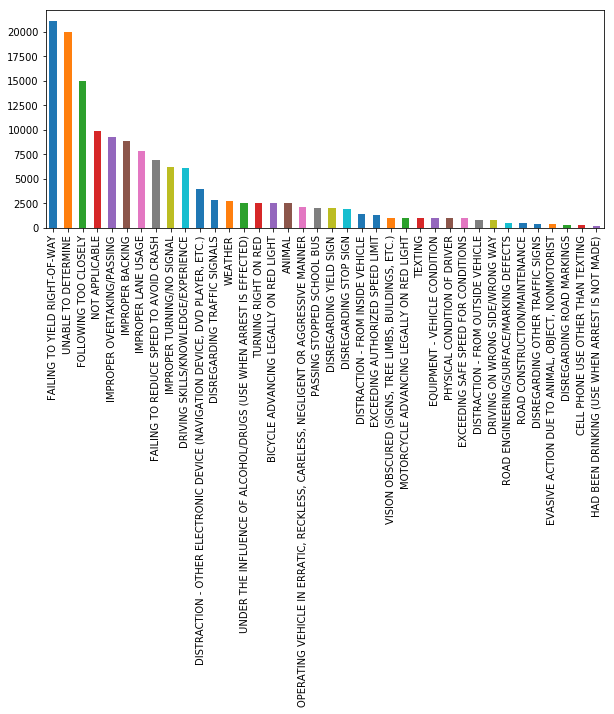

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
result.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar');

In [14]:
#train data after downsampling
ds_ytrain = result['PRIM_CONTRIBUTORY_CAUSE']
ds_xtrain = result.loc[:, result.columns != 'PRIM_CONTRIBUTORY_CAUSE']

###### Scaling of data

In [15]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(ds_xtrain)
X_test_scaled=scaler.transform(X_test)

In [16]:
selector = VarianceThreshold()
X1 = selector.fit_transform(X_train_scaled)
X2 = selector.transform(X_test_scaled)

### Algorithms Implementation

##### MultiLayerPerceptron

In [19]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X1, ds_ytrain)
ypred_mlp_ds = clf.predict(X2)

In [20]:
print('********MultiLayerPerceptron, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_MLP_ds = metrics.f1_score(y_test, ypred_mlp_ds, average='micro')
f1_score_wt_MLP_ds = metrics.f1_score(y_test,ypred_mlp_ds,average='weighted')
precision_score_wt_MLP_ds = metrics.precision_score(y_test, ypred_mlp_ds, average='weighted')
recall_score_wt_MLP_ds = metrics.recall_score(y_test, ypred_mlp_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_MLP_ds)
print('F1-score = ',f1_score_wt_MLP_ds)
print('Precision = ',precision_score_wt_MLP_ds)
print('Recall Score = ',recall_score_wt_MLP_ds)


********MultiLayerPerceptron, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.5533815035061918
F1-score =  0.47512071887392104
Precision =  0.4226206847573111
Recall Score =  0.5533815035061918


###### Random forest

In [45]:
clf=RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X1, ds_ytrain)
ypred_RF_ds = clf.predict(X2)

In [46]:
print('********RF, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_RF_ds = metrics.f1_score(y_test, ypred_RF_ds, average='micro')
f1_score_wt_RF_ds = metrics.f1_score(y_test,ypred_RF_ds,average='weighted')
precision_score_wt_RF_ds = metrics.precision_score(y_test, ypred_RF_ds, average='weighted')
recall_score_wt_RF_ds = metrics.recall_score(y_test, ypred_RF_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_RF_ds)
print('F1-score = ',f1_score_wt_RF_ds)
print('Precision = ',precision_score_wt_RF_ds)
print('Recall Score = ',recall_score_wt_RF_ds)

********RF, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.6149796449048319
F1-score =  0.5928489521192485
Precision =  0.5958713049435029
Recall Score =  0.6149796449048319


###### Naive Bayes

In [21]:
clf=GaussianNB()

clf.fit(X1, ds_ytrain)
ypred_NB_ds = clf.predict(X2)

In [22]:
print('********NB, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_NB_ds = metrics.f1_score(y_test, ypred_NB_ds, average='micro')
f1_score_wt_NB_ds = metrics.f1_score(y_test,ypred_NB_ds,average='weighted')
precision_score_wt_NB_ds = metrics.precision_score(y_test, ypred_NB_ds, average='weighted')
recall_score_wt_NB_ds = metrics.recall_score(y_test, ypred_NB_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_NB_ds)
print('F1-score = ',f1_score_wt_NB_ds)
print('Precision = ',precision_score_wt_NB_ds)
print('Recall Score = ',recall_score_wt_NB_ds)

********NB, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.005435130123409425
F1-score =  0.0038041323691026625
Precision =  0.06517185031451408
Recall Score =  0.005435130123409425


###### Logistic Regression

In [23]:
clf=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

clf.fit(X1, ds_ytrain)
ypred_LR_ds = clf.predict(X2)

In [24]:
print('********Logistic Regression, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_LR_ds = metrics.f1_score(y_test, ypred_LR_ds, average='micro')
f1_score_wt_LR_ds = metrics.f1_score(y_test,ypred_LR_ds,average='weighted')
precision_score_wt_LR_ds = metrics.precision_score(y_test, ypred_LR_ds, average='weighted')
recall_score_wt_LR_ds = metrics.recall_score(y_test, ypred_LR_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_LR_ds)
print('F1-score = ',f1_score_wt_LR_ds)
print('Precision = ',precision_score_wt_LR_ds)
print('Recall Score = ',recall_score_wt_LR_ds)

********Logistic Regression, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.5835837756037258
F1-score =  0.5841680030324714
Precision =  0.5992675803718607
Recall Score =  0.5835837756037258


###### Adaboost Classifier

In [25]:
clf = AdaBoostClassifier(n_estimators=500)

clf.fit(X1, ds_ytrain)
ypred_AB_ds = clf.predict(X2)

In [26]:
print('********Adaboost Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_AB_ds = metrics.f1_score(y_test, ypred_AB_ds, average='micro')
f1_score_wt_AB_ds = metrics.f1_score(y_test,ypred_AB_ds,average='weighted')
precision_score_wt_AB_ds = metrics.precision_score(y_test, ypred_AB_ds, average='weighted')
recall_score_wt_AB_ds = metrics.recall_score(y_test, ypred_AB_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_AB_ds)
print('F1-score = ',f1_score_wt_AB_ds)
print('Precision = ',precision_score_wt_AB_ds)
print('Recall Score = ',recall_score_wt_AB_ds)

********Adaboost Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.6003367649252936
F1-score =  0.5541082019828412
Precision =  0.5340010455611829
Recall Score =  0.6003367649252936


###### Bagging with Extratrees Classifier

In [27]:
clf = BaggingClassifier(ExtraTreesClassifier()) 

clf.fit(X1, ds_ytrain)
ypred_BET_ds = clf.predict(X2)

In [28]:
print('********Bagging with ExtraTrees Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_BET_ds = metrics.f1_score(y_test, ypred_BET_ds, average='micro')
f1_score_wt_BET_ds = metrics.f1_score(y_test,ypred_BET_ds,average='weighted')
precision_score_wt_BET_ds = metrics.precision_score(y_test, ypred_BET_ds, average='weighted')
recall_score_wt_BET_ds = metrics.recall_score(y_test, ypred_BET_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_BET_ds)
print('F1-score = ',f1_score_wt_BET_ds)
print('Precision = ',precision_score_wt_BET_ds)
print('Recall Score = ',recall_score_wt_BET_ds)

********Bagging with ExtraTrees Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.6151501587910565
F1-score =  0.5942139473759371
Precision =  0.5934593966624218
Recall Score =  0.6151501587910565


###### Bagging with RandomForest Classifier

In [29]:
clf = BaggingClassifier(RandomForestClassifier()) 

clf.fit(X1, ds_ytrain)
ypred_BRF_ds = clf.predict(X2)

In [30]:
print('********Bagging with RF Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_BRF_ds = metrics.f1_score(y_test, ypred_BRF_ds, average='micro')
f1_score_wt_BRF_ds = metrics.f1_score(y_test,ypred_BRF_ds,average='weighted')
precision_score_wt_BRF_ds = metrics.precision_score(y_test, ypred_BRF_ds, average='weighted')
recall_score_wt_BRF_ds = metrics.recall_score(y_test, ypred_BRF_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_BRF_ds)
print('F1-score = ',f1_score_wt_BRF_ds)
print('Precision = ',precision_score_wt_BRF_ds)
print('Recall Score = ',recall_score_wt_BRF_ds)

********Bagging with RF Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.6166421552955219
F1-score =  0.5922019479283691
Precision =  0.595417725611305
Recall Score =  0.6166421552955219


###### Bagging with LDA

In [34]:
clf = BaggingClassifier(LinearDiscriminantAnalysis()) 

clf.fit(X1, ds_ytrain)
ypred_BLDA_ds = clf.predict(X2)

In [35]:
print('********Bagging with LDA Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_BLDA_ds = metrics.f1_score(y_test, ypred_BLDA_ds, average='micro')
f1_score_wt_BLDA_ds = metrics.f1_score(y_test,ypred_BLDA_ds,average='weighted')
precision_score_wt_BLDA_ds = metrics.precision_score(y_test, ypred_BLDA_ds, average='weighted')
recall_score_wt_BLDA_ds = metrics.recall_score(y_test, ypred_BLDA_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_BLDA_ds)
print('F1-score = ',f1_score_wt_BLDA_ds)
print('Precision = ',precision_score_wt_BLDA_ds)
print('Recall Score = ',recall_score_wt_BLDA_ds)

********Bagging with LDA Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.5691753522177462
F1-score =  0.5728228993064186
Precision =  0.5998331715382869
Recall Score =  0.5691753522177462


###### Bagging with DT

In [36]:
clf = BaggingClassifier(DecisionTreeClassifier()) 

clf.fit(X1, ds_ytrain)
ypred_BDT_ds = clf.predict(X2)

In [37]:
print('********Bagging with DT Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_BDT_ds = metrics.f1_score(y_test, ypred_BDT_ds, average='micro')
f1_score_wt_BDT_ds = metrics.f1_score(y_test,ypred_BDT_ds,average='weighted')
precision_score_wt_BDT_ds = metrics.precision_score(y_test, ypred_BDT_ds, average='weighted')
recall_score_wt_BDT_ds = metrics.recall_score(y_test, ypred_BDT_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_BDT_ds)
print('F1-score = ',f1_score_wt_BDT_ds)
print('Precision = ',precision_score_wt_BDT_ds)
print('Recall Score = ',recall_score_wt_BDT_ds)

********Bagging with DT Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.567406270648166
F1-score =  0.5647046316215365
Precision =  0.5841567717575016
Recall Score =  0.567406270648166


###### Decision Tree Classifier

In [38]:
clf=tree.DecisionTreeClassifier()

clf.fit(X1, ds_ytrain)
ypred_DT_ds = clf.predict(X2)

In [39]:
print('********DT Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_DT_ds = metrics.f1_score(y_test, ypred_DT_ds, average='micro')
f1_score_wt_DT_ds = metrics.f1_score(y_test,ypred_DT_ds,average='weighted')
precision_score_wt_DT_ds = metrics.precision_score(y_test, ypred_DT_ds, average='weighted')
recall_score_wt_DT_ds = metrics.recall_score(y_test, ypred_DT_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_DT_ds)
print('F1-score = ',f1_score_wt_DT_ds)
print('Precision = ',precision_score_wt_DT_ds)
print('Recall Score = ',recall_score_wt_DT_ds)

********DT Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.44546752776179205
F1-score =  0.46024015558115017
Precision =  0.5049560583041984
Recall Score =  0.4454675277617921


###### ExtraTrees Classifier

In [40]:
clf=ExtraTreesClassifier()

clf.fit(X1, ds_ytrain)
ypred_ET_ds = clf.predict(X2)

In [41]:
print('********ET Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_ET_ds = metrics.f1_score(y_test, ypred_ET_ds, average='micro')
f1_score_wt_ET_ds = metrics.f1_score(y_test,ypred_ET_ds,average='weighted')
precision_score_wt_ET_ds = metrics.precision_score(y_test, ypred_ET_ds, average='weighted')
recall_score_wt_ET_ds = metrics.recall_score(y_test, ypred_ET_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_ET_ds)
print('F1-score = ',f1_score_wt_ET_ds)
print('Precision = ',precision_score_wt_ET_ds)
print('Recall Score = ',recall_score_wt_ET_ds)

********ET Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.5400814203806723
F1-score =  0.533681422729938
Precision =  0.557367843453029
Recall Score =  0.5400814203806723


###### LDA

In [42]:
clf=LDA()

clf.fit(X1, ds_ytrain)
ypred_LDA_ds = clf.predict(X2)

In [43]:
print('********LDA Classifier, Sampled, Standard Scaled, Variance threshold','********')

f1_score_micro_LDA_ds = metrics.f1_score(y_test, ypred_LDA_ds, average='micro')
f1_score_wt_LDA_ds = metrics.f1_score(y_test,ypred_LDA_ds,average='weighted')
precision_score_wt_LDA_ds = metrics.precision_score(y_test, ypred_LDA_ds, average='weighted')
recall_score_wt_LDA_ds = metrics.recall_score(y_test, ypred_LDA_ds, average='weighted')

print('F1-score_micro = ',f1_score_micro_LDA_ds)
print('F1-score = ',f1_score_wt_LDA_ds)
print('Precision = ',precision_score_wt_LDA_ds)
print('Recall Score = ',recall_score_wt_LDA_ds)

********LDA Classifier, Sampled, Standard Scaled, Variance threshold ********
F1-score_micro =  0.5504827674403734
F1-score =  0.5637284005284732
Precision =  0.6088633010689604
Recall Score =  0.5504827674403734


###### Variables import

In [47]:
import pickle
sampled_variables = {
    'f1_score_wt_MLP_ds': f1_score_wt_MLP_ds,
    'f1_score_wt_RF_ds': f1_score_wt_RF_ds,
    'f1_score_wt_NB_ds': f1_score_wt_NB_ds,
    'f1_score_wt_LR_ds': f1_score_wt_LR_ds,
    'f1_score_wt_AB_ds': f1_score_wt_AB_ds,
    'f1_score_wt_BET_ds': f1_score_wt_BET_ds,
    'f1_score_wt_BRF_ds': f1_score_wt_BRF_ds,
    'f1_score_wt_BLDA_ds': f1_score_wt_BLDA_ds,
    'f1_score_wt_BDT_ds': f1_score_wt_BDT_ds,
    'f1_score_wt_DT_ds': f1_score_wt_DT_ds,
    'f1_score_wt_ET_ds': f1_score_wt_ET_ds,
    'f1_score_wt_LDA_ds': f1_score_wt_LDA_ds   
}
pickle.dump(sampled_variables,open("sampled_variables.p","wb"))